## Overview
A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem
Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

exploring differeent ideas on what define a successful film 
profit margin based on domestic gross 


In [1]:
!ls Data

bom.movie_gross.csv       imdb.title.crew.csv       rt.reviews.tsv
imdb.name.basics.csv      imdb.title.principals.csv tmdb.movies.csv
imdb.title.akas.csv       imdb.title.ratings.csv    tn.movie_budgets.csv
imdb.title.basics.csv     rt.movie_info.tsv


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
bom_df= pd.read_csv('data/bom.movie_gross.csv')
imbd_name_df= pd.read_csv('data/imdb.name.basics.csv')
akas_df=pd.read_csv('data/imdb.title.akas.csv')
basics_df= pd.read_csv('data/imdb.title.basics.csv')
crew_df= pd.read_csv('data/imdb.title.crew.csv')
principals_df= pd.read_csv('data/imdb.title.principals.csv')
ratings_df=pd.read_csv('data/imdb.title.ratings.csv')

## Data Preparation

In [3]:
import string

#removing punctuations 
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

bom_df["title"] = bom_df['title'].apply(remove_punctuations)
bom_df["title"]= bom_df["title"].str.lower()

In [4]:
#renaming the column to merge tables
akas_df.rename(columns={'title_id':'tconst'}, inplace=True)
akas_df.rename(columns={'title':'title_akas'}, inplace=True)
#removing punctuations and lower case title
akas_df["title_akas"] = akas_df['title_akas'].apply(remove_punctuations)
basics_df["primary_title"] = basics_df['primary_title'].apply(remove_punctuations)
akas_df["title_akas"] = akas_df['title_akas'].str.lower()
basics_df["primary_title"]= basics_df['primary_title'].str.lower()

In [5]:
#combining akas and basics 
imbd_info_df1= akas_df.merge(basics_df, on = 'tconst', how ='outer')
imbd_info_df1.head()

,tconst,ordering,title_akas,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0369610,10.0,джурасик свят,BG,bg,NaN,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
1,tt0369610,11.0,jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
2,tt0369610,12.0,jurassic world o mundo dos dinossauros,BR,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
3,tt0369610,13.0,o mundo dos dinossauros,BR,NaN,NaN,short title,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
4,tt0369610,14.0,jurassic world,FR,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"


In [6]:
#merging ratings 
imbd_info_df2 = imbd_info_df1.merge(ratings_df, on='tconst',how ='outer')
imbd_info_df2.head()

,tconst,ordering,title_akas,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0369610,10.0,джурасик свят,BG,bg,NaN,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
1,tt0369610,11.0,jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
2,tt0369610,12.0,jurassic world o mundo dos dinossauros,BR,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
3,tt0369610,13.0,o mundo dos dinossauros,BR,NaN,NaN,short title,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
4,tt0369610,14.0,jurassic world,FR,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0


In [38]:
#merging bom 
imbd_info_df3 = imbd_info_df2.merge(bom_df,left_on='primary_title', right_on='title', how ='outer')
imbd_info_df3['studio'].nunique()

257

imbd_cast_df1 = imbd_name_df.merge(principals_df, on='nconst')
imbd_cast_df1.head()

imbd_cast_df2 = imbd_cast_df1.merge(crew_df, on='tconst')
imbd_cast_df2.head()

In [8]:
#converting foreign gross column into float
imbd_info_df3['foreign_gross']= imbd_info_df3['foreign_gross'].astype(str)
imbd_info_df3['foreign_gross'] = imbd_info_df3['foreign_gross'].apply(remove_punctuations)
imbd_info_df3['foreign_gross']= imbd_info_df3['foreign_gross'].astype(float)

In [33]:
#remove duplicates
imbd_info_df_main_clean= imbd_info_df_main.drop_duplicates().copy()
imbd_info_df_main_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60104 entries, 0 to 356189
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          59027 non-null  object 
 1   domestic_gross  4042 non-null   float64
 2   averagerating   58372 non-null  float64
 3   numvotes        58372 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.3+ MB


In [24]:
imbd_info_df3.corr()['domestic_gross'].sort_values()


is_original_title   -0.055321
year                 0.009979
start_year           0.055278
averagerating        0.200859
runtime_minutes      0.260283
ordering             0.310141
numvotes             0.693550
foreign_gross        0.799790
domestic_gross       1.000000
Name: domestic_gross, dtype: float64

In [26]:
#selecting only the necessary columns
imbd_info_df_main= imbd_info_df3[['genres','domestic_gross','averagerating','numvotes']]
imbd_info_df_foreign = imbd_info_df3[['genres','foreign_gross','region']]

In [27]:
#remove null
imbd_info_df_foreign_clean = imbd_info_df_foreign.dropna(subset=['foreign_gross'], axis=0).copy()

In [28]:
#remove null
imbd_info_df_main_clean= imbd_info_df_main.dropna(subset=['domestic_gross'], axis=0).copy()
imbd_info_df_main_clean.head()

,genres,domestic_gross,averagerating,numvotes
0,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0
1,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0
2,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0
3,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0
4,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0


<ipython-input-43-9a0732de9c49>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  imbd_info_df_main_clean.groupby(['genres'])['domestic_gross', 'numvotes'].mean().head(10).plot(kind ='bar', rot=90, stacked = True)


Text(0.5, 0, 'genres')

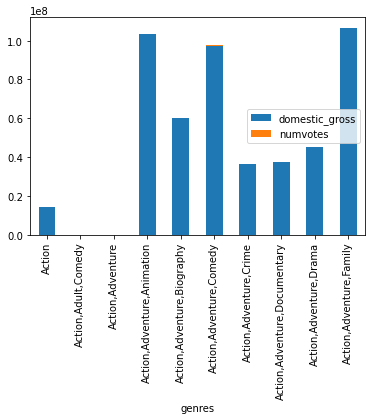

In [43]:
imbd_info_df_main_clean.groupby(['genres'])['domestic_gross', 'numvotes'].mean().head(10).plot(kind ='bar', rot=90, stacked = True)
plt.xlabel("genres")

In [45]:
#creating total rating to find weighted rating 
imbd_info_df_main_clean.eval('total_rating= averagerating *numvotes', inplace=True)

In [46]:
imbd_info_df_main_clean.head().reset_index()

,index,genres,domestic_gross,averagerating,numvotes,total_rating
0,0,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0,3775366.0
1,48,Drama,NaN,7.6,23.0,174.8
2,49,"Action,Adventure,Sci-Fi",73100000.0,6.6,241792.0,1595827.2
3,83,Documentary,NaN,7.0,5.0,35.0
4,86,"Documentary,Music",NaN,NaN,NaN,NaN


In [47]:
imbd_info_df_foreign_clean['region'].nunique()

105

## Data Modeling

<AxesSubplot:xlabel='region'>

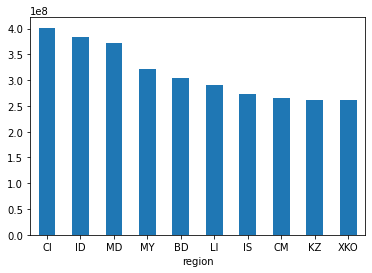

In [48]:
gross_per_genre = imbd_info_df_foreign_clean.groupby(['region'])['foreign_gross'].mean().sort_values(ascending=False)
gross_per_genre.head(10).plot(kind = 'bar', rot=0)
#values= ['Bangladesh','Indonesia','Cote d'Ivoire','Republic of Moldova','Malaysia','Liechtenstein','Iceland', 'Cameroon, "Kazakhstan"]
#plt.set_xticklabels(values)

In [50]:
imbd_info_df_main_clean.corr()['domestic_gross'].sort_values()

averagerating     0.119160
total_rating      0.644021
numvotes          0.667728
domestic_gross    1.000000
Name: domestic_gross, dtype: float64

In [51]:
imbd_info_df_main_clean['domestic_gross'].apply(['mean', 'median', 'std', 'max', 'min'])

mean      2.885592e+07
median    1.500000e+06
std       6.557332e+07
max       9.367000e+08
min       1.000000e+02
Name: domestic_gross, dtype: float64

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize=(14,6), ncols=2)
ax1.set_xlim(1, 10) 
ax1.set_ylim(2.690981e+07, 1.164440e+08)
ax2.set_xlim(1, 10) 
ax2.set_ylim(1.471160e+04, 1.0e+06)

ax1.scatter(imbd_info_df_main_clean1['weighted_rating'], imbd_info_df_main_clean1['domestic_gross'], color='red', marker='x')
ax2.scatter(imbd_info_df_main_clean1['weighted_rating'], imbd_info_df_main_clean1['numvotes'], color='lightblue', marker='x')

fig.legend(labels=["rating vs gross", "rating vs number of votes"], loc=(.68, .88));
ax1.set_xlabel('weighted rating')
ax1.set_ylabel('domestic gross')

ax2.set_xlabel('weighted rating')
ax2.set_ylabel('number of votes')


<AxesSubplot:xlabel='genres'>

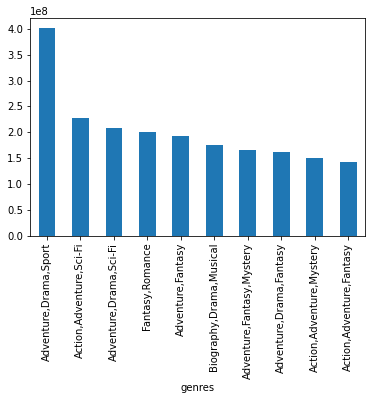

In [52]:
#top genres based on domestic gross 
gross_per_genre1 = imbd_info_df_main_clean.groupby(['genres'])['domestic_gross'].mean().sort_values(ascending=False)
gross_per_genre1.head(10).plot(kind = 'bar', rot=90)

In [53]:
#stats on domestic gross 
#not a normal distribution 
gross_per_genre1.apply(['mean', 'median', 'std', 'max', 'min'])

mean      2.765678e+07
median    1.249756e+07
std       4.353415e+07
max       4.007000e+08
min       2.800000e+03
Name: domestic_gross, dtype: float64

In [54]:
#outlier
gross_per_genre1.max()/gross_per_genre1.std()

9.204268558067032

In [55]:
#outlier
gross_per_genre1.min()/gross_per_genre1.std()

6.431732458843945e-05

In [57]:
#finding weighted rating
totalvote_per_genre = imbd_info_df_main_clean.groupby(['genres'])['numvotes'].sum()
totalvote_df = totalvote_per_genre.to_frame()
totalrating_per_genre = imbd_info_df_main_clean.groupby(['genres'])['total_rating'].sum()
totalrating_df = totalrating_per_genre.to_frame()
gross_df= gross_per_genre1.to_frame()

In [58]:
weighted_rating = totalrating_df.merge(totalvote_df, on='genres', how='outer')
weighted_rating['weighted_rating']= weighted_rating['total_rating']/weighted_rating['numvotes']
weighted_rating.reset_index()

,genres,total_rating,numvotes,weighted_rating
0,Action,1823039.4,327598.0,5.564867
1,"Action,Adult,Comedy",142.4,36.0,3.955556
2,"Action,Adventure",587316.9,109011.0,5.387685
3,"Action,Adventure,Animation",27159618.2,3570489.0,7.606694
4,"Action,Adventure,Biography",7604775.0,999701.0,7.607050
...,...,...,...,...
1080,"Thriller,War,Western",0.0,0.0,NaN
1081,"Thriller,Western",84079.8,13288.0,6.327498
1082,War,36959.2,5535.0,6.677362
1083,"War,Western",0.0,0.0,NaN


In [59]:
gross_df

,domestic_gross
genres,
"Adventure,Drama,Sport",4.007000e+08
"Action,Adventure,Sci-Fi",2.280490e+08
"Adventure,Drama,Sci-Fi",2.082000e+08
"Fantasy,Romance",2.005215e+08
"Adventure,Fantasy",1.929000e+08
...,...
Talk-Show,NaN
"Thriller,War",NaN
"Thriller,War,Western",NaN


In [60]:
#creating the final dataframe for scatter plots 
final_df= gross_df.merge(weighted_rating, on='genres')
#final_df['numvotes'].apply(['mean', 'median', 'std', 'max', 'min'])

In [61]:
#finding to be shown through scatter plots 
correlation_dome = final_df.corr()['weighted_rating'].sort_values()
correlation_dome 

domestic_gross     0.089413
numvotes           0.102623
total_rating       0.109362
weighted_rating    1.000000
Name: weighted_rating, dtype: float64

Text(0, 0.5, 'number of votes')

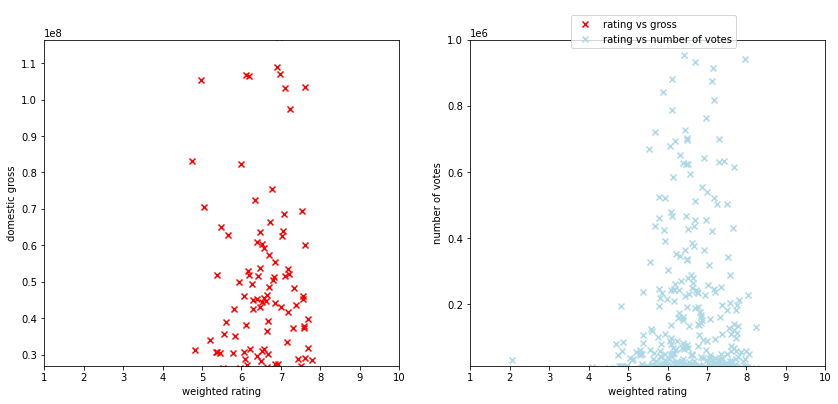

In [62]:
fig, (ax1, ax2) = plt.subplots(figsize=(14,6), ncols=2)
ax1.set_xlim(1, 10) 
ax1.set_ylim(2.690981e+07, 1.164440e+08)
ax2.set_xlim(1, 10) 
ax2.set_ylim(1.471160e+04, 1.0e+06)

ax1.scatter(final_df['weighted_rating'], final_df['domestic_gross'], color='red', marker='x')
ax2.scatter(final_df['weighted_rating'], final_df['numvotes'], color='lightblue', marker='x')

fig.legend(labels=["rating vs gross", "rating vs number of votes"], loc=(.68, .88));
ax1.set_xlabel('weighted rating')
ax1.set_ylabel('domestic gross')

ax2.set_xlabel('weighted rating')
ax2.set_ylabel('number of votes')


## Evaluation

Highest gross genre is scifi and region is Bangladesh. 
